# mark-minervini-trend-template

เอกสารประกอบ <br>
https://www.siamquant.com/mark-minervini-trend-template-style/

![title](Minervini-Trend-Template-Stock.png)
![title](Minervini-Trend-Template.png)

In [2]:
#!pip install starfishX --upgrade

In [3]:
#!pip install starfishX --upgrade
import starfishX as sx
from starfishX.utilHelpers import HistStockPrice

#!pip install mplcyberpunk
import mplcyberpunk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import text

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use("cyberpunk")

In [4]:
print(sx.__version__)

0.155544


# ทดสอบหา ROC เมื่อเทียบกับ SET Index

ROC = ((Close Price[Today] – Close Price[Prev. 250 Period])/
       Close Price [Prev. 250 Period])*100

In [5]:
obj = HistStockPrice() 

you are using nologin method, data you access may be limited


In [6]:
#เตรียมข้อ 7
basket = sx.getMemberOfIndex(sx.indexMarket.SET100)

# add ตลาดเข้ามาด้วย
basket = np.append(basket,'SET') 

#หรืออยากเพิ่มสมาชิกเข้ามา เพื่อวัด RS 
basket = np.append(basket,'JKN') 
basket = np.append(basket,'SFT')

basket = list(set(basket))
print(basket)

['AOT', 'WHA', 'ACE', 'KTB', 'SUPER', 'GLOBAL', 'HANA', 'CBG', 'BAM', 'OSP', 'RCL', 'TIPH', 'EGCO', 'TOP', 'BANPU', 'SFT', 'SET', 'AP', 'PLANB', 'PTT', 'PTG', 'OR', 'ADVANC', 'DOHOME', 'RBF', 'BEM', 'TISCO', 'ORI', 'GULF', 'CHG', 'LH', 'TASCO', 'ESSO', 'ONEE', 'CPN', 'BH', 'TQM', 'AMATA', 'BTS', 'TIDLOR', 'CENTEL', 'CK', 'JMT', 'BGRIM', 'FORTH', 'SAWAD', 'TTA', 'THANI', 'RATCH', 'BDMS', 'HMPRO', 'SCC', 'EA', 'KKP', 'MAJOR', 'JKN', 'BBL', 'CPF', 'GPSC', 'BCPG', 'BLA', 'STARK', 'VGI', 'BEC', 'TCAP', 'QH', 'TRUE', 'STA', 'STGT', 'EPG', 'MTC', 'TTB', 'CRC', 'KCE', 'SPALI', 'COM7', 'SYNEX', 'AWC', 'KBANK', 'SINGER', 'AEONTS', 'PTTEP', 'JMART', 'SCGP', 'PSL', 'MINT', 'DTAC', 'CPALL', 'BCH', 'IVL', 'IRPC', 'MEGA', 'GUNKUL', 'KEX', 'SCB', 'PTTGC', 'BCP', 'CKP', 'TU', 'KTC', 'SPRC', 'INTUCH', 'STEC']


In [7]:
from starfishX.markminervini.trendtemplate import ROC_Basket
from starfishX.markminervini.trendtemplate import trendMA_YMF
from starfishX.markminervini.trendtemplate import trendMA_Year
from starfishX.markminervini.trendtemplate import check52WeekHighLow

.......................................................................................................done


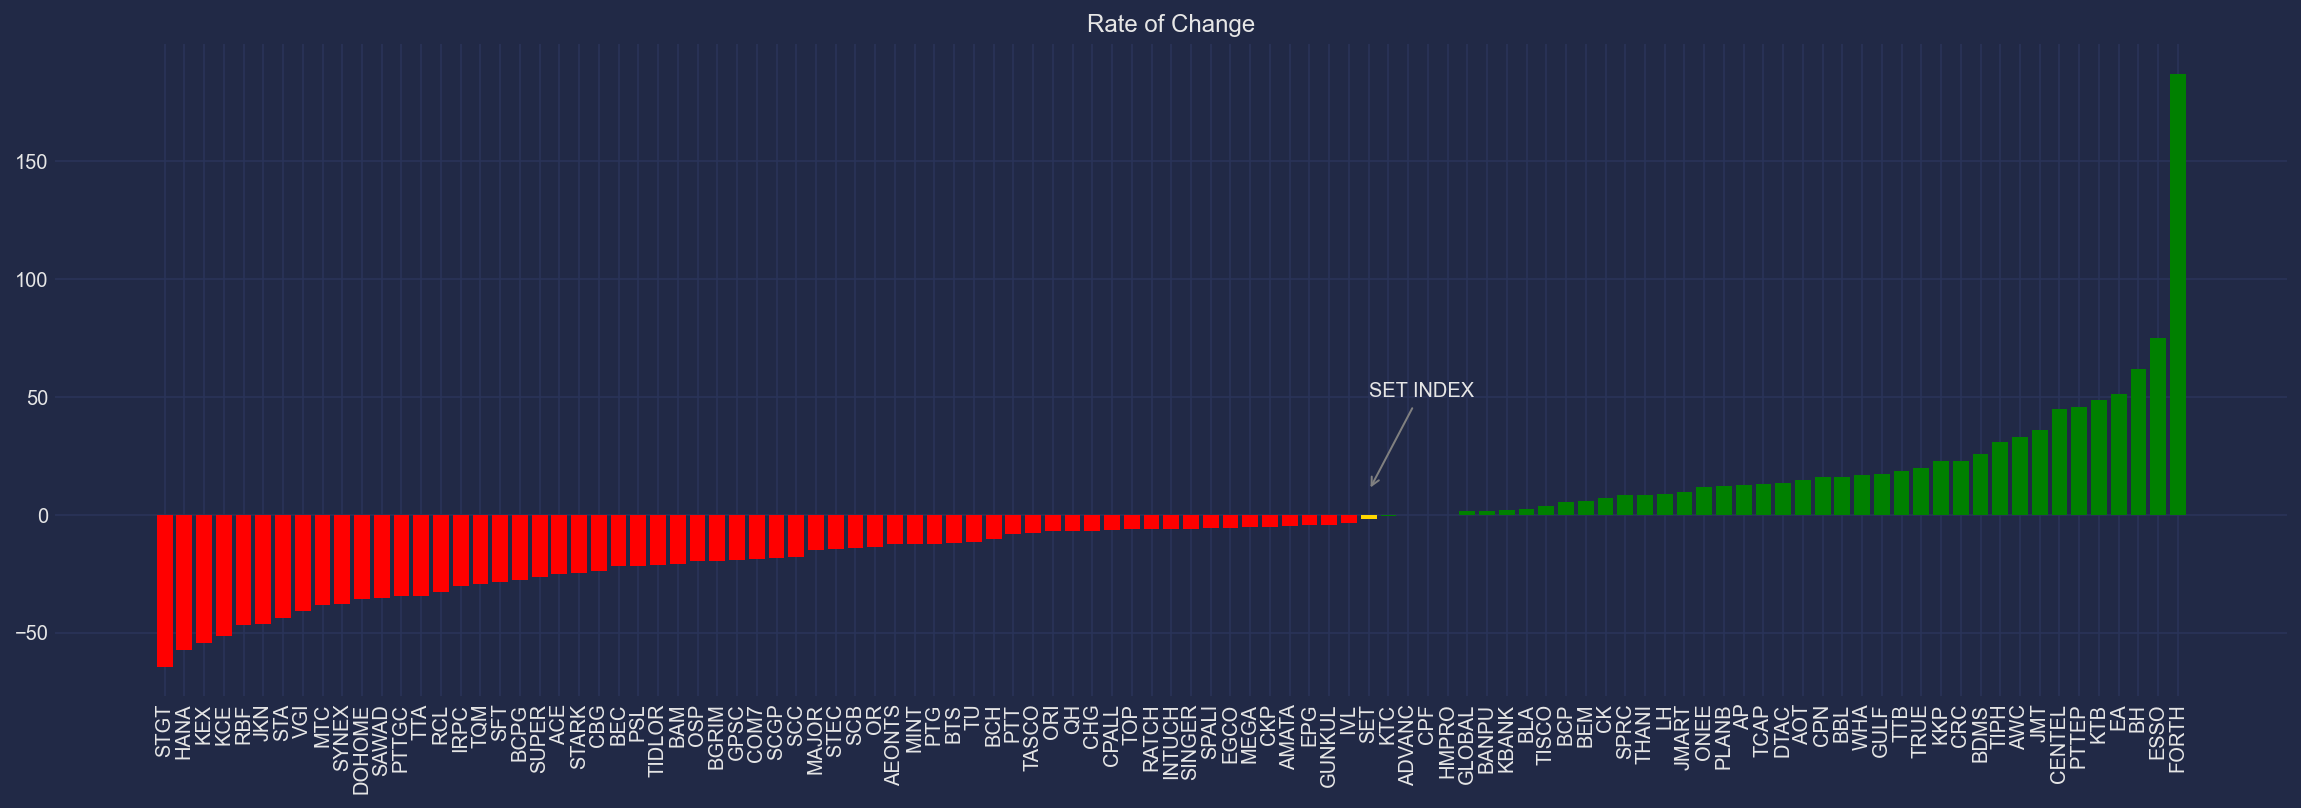

In [8]:
roc_df = ROC_Basket(basket,start='2021-10-26',engine=obj) #ใช้ ROC ควรระยะประมาณ 1 ปี

In [9]:
cnt = len(roc_df)*0.20 # จะเอา RS ที่เท่าไหร่ เช่น 20 ตัวบน ใส่ 0.2 
cnt = int(cnt//1)
cnt

20

In [10]:
set_chg = roc_df[roc_df.index=='SET'].pct_chg.values[0]

roc_more_set = roc_df[roc_df['pct_chg']>set_chg].sort_values('pct_chg',ascending=False)
roc_more_set = roc_more_set.head(cnt)
roc_more_set

close_start  close_end  pct_chg   no
symbol                                      
FORTH         18.30      52.50   186.89  102
ESSO           8.40      14.70    75.00  101
BH           139.00     225.00    61.87  100
EA            64.75      97.75    50.97   99
KTB           11.70      17.40    48.72   98
PTTEP        124.00     180.50    45.56   97
CENTEL        35.75      51.75    44.76   96
JMT           47.63      64.75    35.96   95
AWC            4.48       5.95    32.81   94
TIPH          41.50      54.25    30.72   93
BDMS          23.70      29.75    25.53   92
CRC           34.25      42.00    22.63   91
KKP           58.75      72.00    22.55   90
TRUE           4.12       4.94    19.90   89
TTB            1.14       1.35    18.42   88
GULF          43.25      50.75    17.34   87
WHA            3.36       3.92    16.67   86
BBL          124.00     144.00    16.13   85
CPN           59.00      68.50    16.10   84
AOT           64.00      73.50    14.84   83

In [12]:
for i in roc_more_set.head(cnt).index:
  symbol = i
  print(symbol)
  start = '2020-01-01'
  k1,log = trendMA_YMF(symbol,start=start,engine=obj,plot=False)
  print(log)
  k2,log = trendMA_Year(symbol,start,engine=obj,month=5,plot=False)
  print(log)
  k3,log = check52WeekHighLow(symbol,start,engine=obj,plot=False)
  print(log)
  if(k1 and k2 and k3):
     print('**** Pass',i) 
  else:
     print('### Fail',i)
  print('-----------------------')      

FORTH
fail condition (1),(2),(4) และ (8)
pass slope(+) pass condition (3)slope :0.16125096149214435
pass condition (5) ,last price -17.32% and pass condition (6) ,last price 205.23%
### Fail FORTH
-----------------------
ESSO
pass condition (1),(2),(4) และ (8) : close > MA50 , MA50 > MA150 , MA150 > MA200
pass slope(+) pass condition (3)slope :0.02067255483172913
pass condition (5) ,last price 0.0% and pass condition (6) ,last price 104.17%
**** Pass ESSO
-----------------------
BH
pass condition (1),(2),(4) และ (8) : close > MA50 , MA50 > MA150 , MA150 > MA200
pass slope(+) pass condition (3)slope :0.28664255122511945
pass condition (5) ,last price -4.26% and pass condition (6) ,last price 68.54%
**** Pass BH
-----------------------
EA
fail condition (1),(2),(4) และ (8)
pass slope(+) pass condition (3)slope :0.08789206095169377
pass condition (5) ,last price -2.25% and pass condition (6) ,last price 53.94%
### Fail EA
-----------------------
KTB
pass condition (1),(2),(4) และ (8) : cl

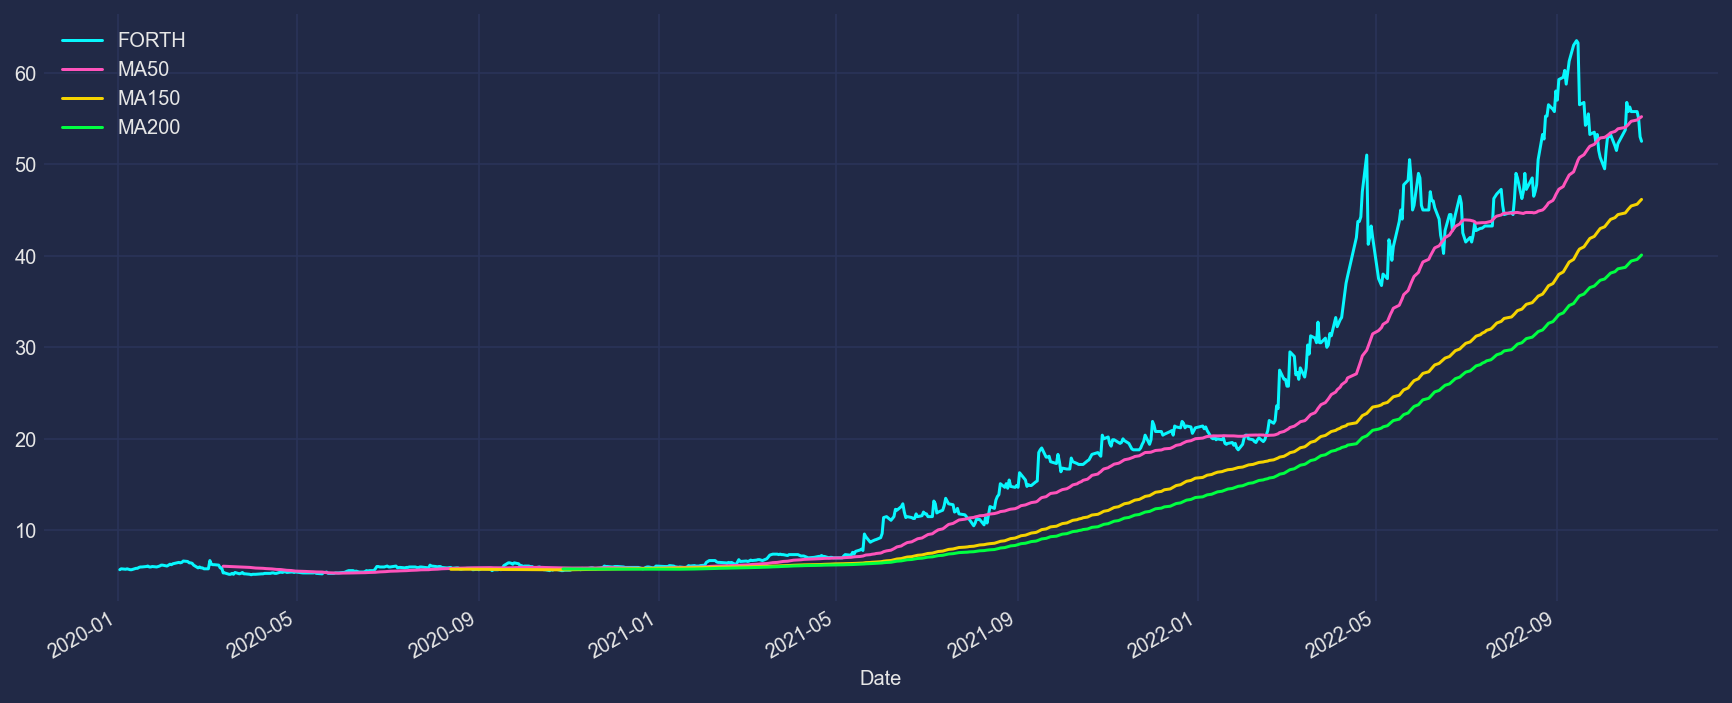

fail condition (1),(2),(4) และ (8)
----


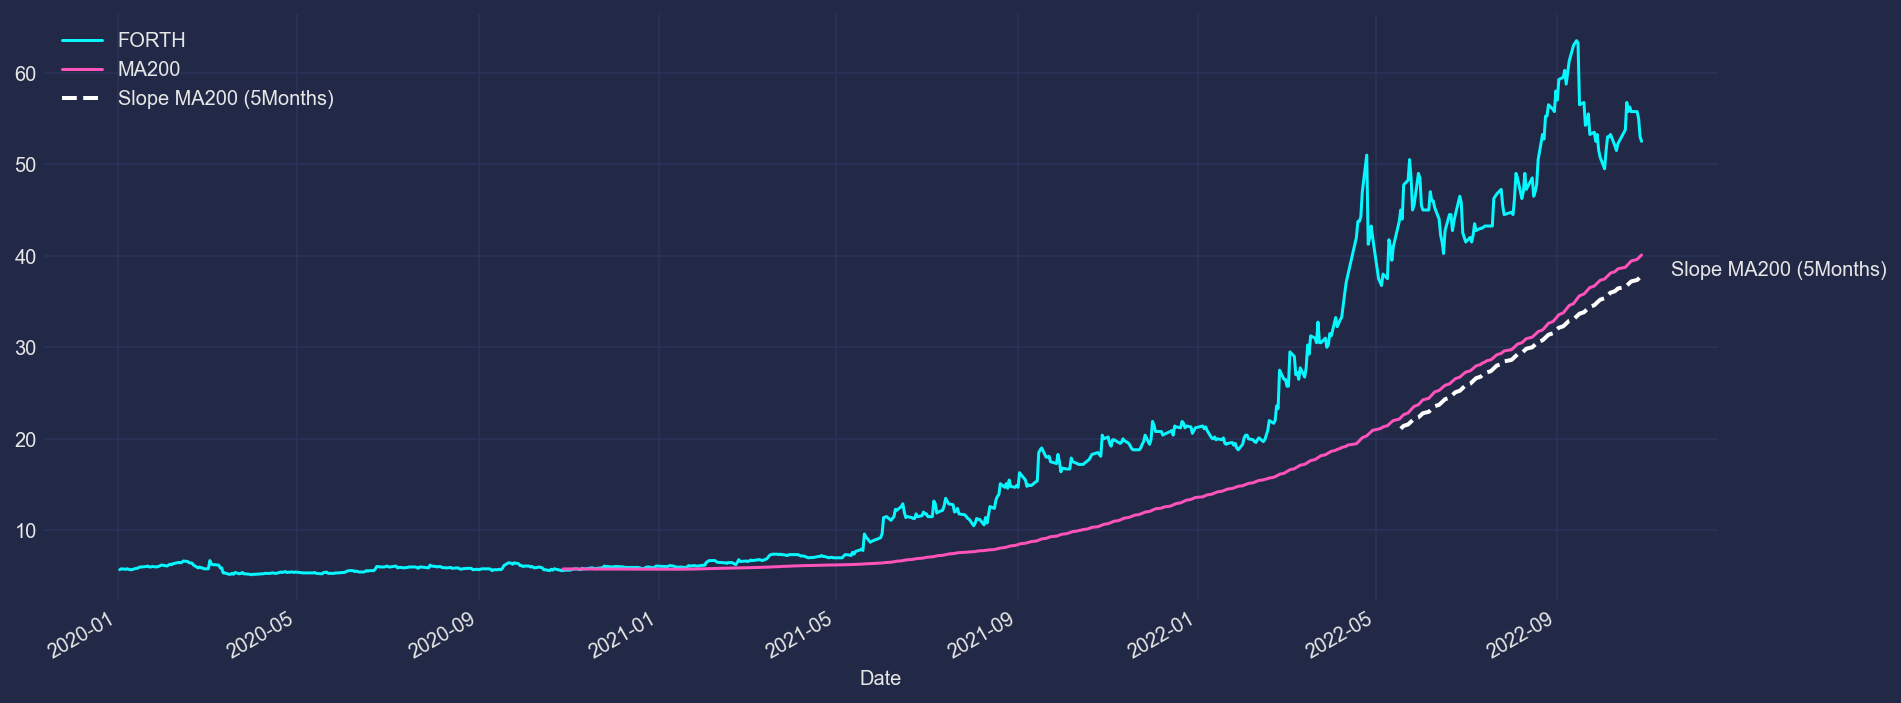

pass slope(+) pass condition (3)slope :0.16125096149214435
----
pass condition (5) ,last price -17.32% and pass condition (6) ,last price 205.23%
----


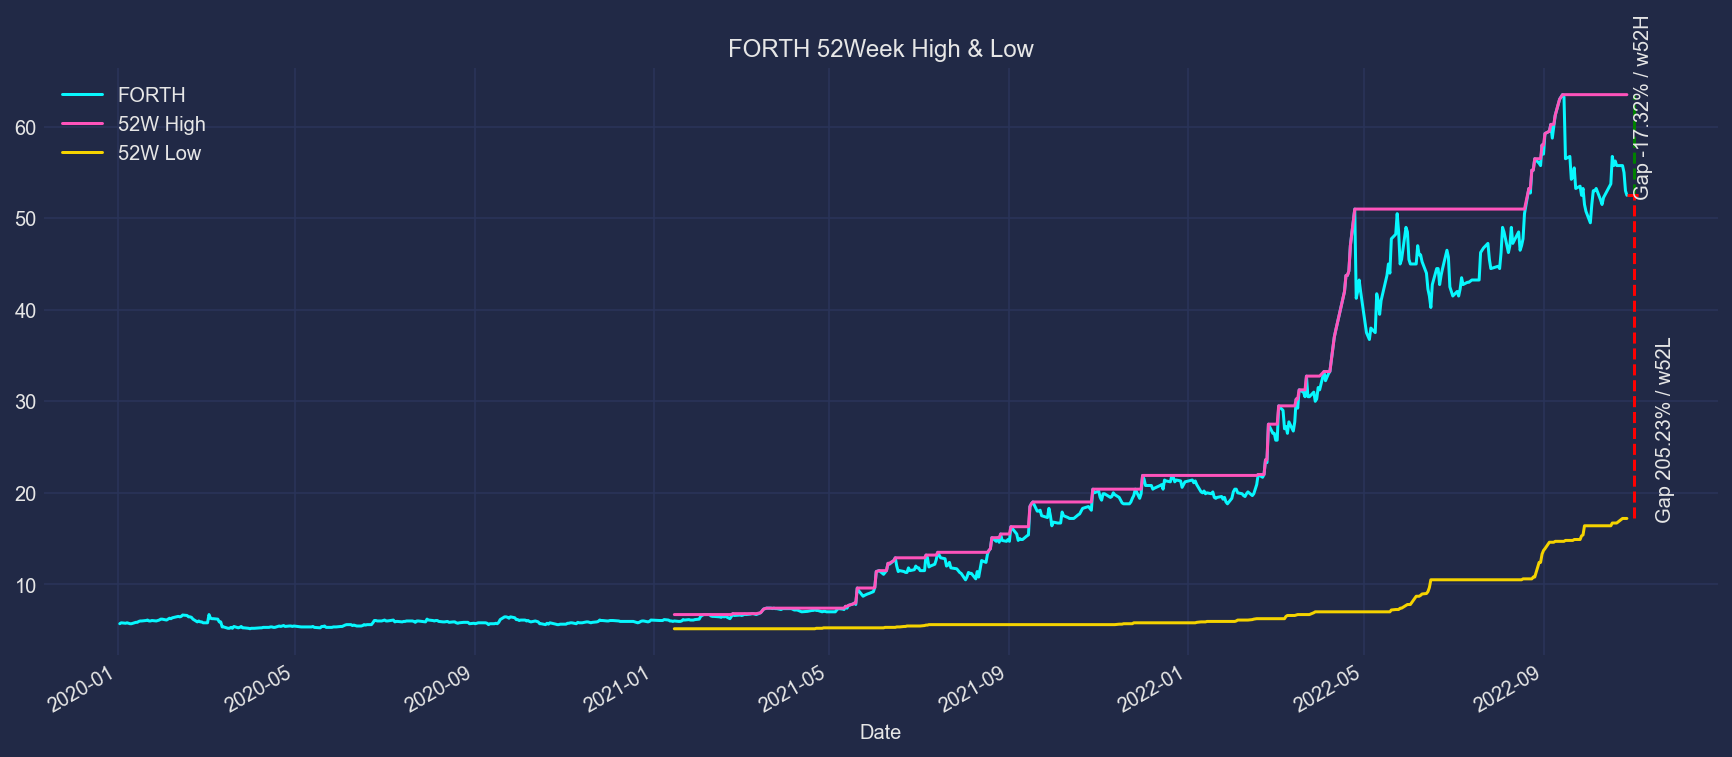

In [16]:
symbol = 'FORTH'
start = '2020-01-01'
_,log = trendMA_YMF(symbol,start=start,engine=obj)
print(log)
print('----')
_,log = trendMA_Year(symbol,start,engine=obj,month=5)
print(log)
print('----')
_,log = check52WeekHighLow(symbol,start,engine=obj)
print(log)
print('----')